# Insurance Charges Dataset

Based on the personal information and the geographical data predict the insurance charges for every person.

https://github.com/stedy/Machine-Learning-with-R-datasets

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [45]:
#Reading the data 
df_ins = pd.read_csv(r'C:\Users\Lokesh Balaji\Desktop\NEU Study\INFO6105\insurance.csv')
df_ins.head


<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [46]:
cols = list(df_ins.columns)

In [47]:
# pre defined function for preprocessinh the data
# to convert catagorical values and to calcuale mean

def str_to_cat(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
    return my_df
def mydf_to_nums(my_df, feature, null_status):
    if not is_numeric_dtype(feature):
        my_df[null_status] = feature.cat.codes + 1
        
def mydf_imputer(my_df, feature, null_status, null_table):
    if is_numeric_dtype(feature):
        if pd.isnull(feature).sum() or (null_status in null_table):
            my_df[null_status+'_na'] = pd.isnull(feature)
            filler = null_table[null_status] if null_status in null_table else feature.median()
            my_df[null_status] = feature.fillna(filler)
            null_table[null_status] = filler
    return null_table   

def mydf_preprocessor(my_df, null_table):
    '''null_table  = your table or None'''
    
    if null_table is None: 
        null_table = dict()
    for p,q in my_df.items(): 
        null_table = mydf_imputer(my_df, q, p, null_table)
    for p,q in my_df.items(): 
        mydf_to_nums(my_df, q, p)
    my_df = pd.get_dummies(my_df, dummy_na = True)
    res = [my_df, null_table]
    return res

In [48]:
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()

def my_rmse(y1,y2):
    return np.sqrt(((y1-y2)**2).mean())

In [49]:
#funtion implementation
df_ins_1 = str_to_cat(df_ins)
df_ins_2,my_table = mydf_preprocessor(df_ins_1,null_table = None)
df_ins_2.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,4,16884.92400
1,18,2,33.770,1,1,3,1725.55230
2,28,2,33.000,3,1,3,4449.46200
3,33,2,22.705,0,1,2,21984.47061
4,32,2,28.880,0,1,2,3866.85520


In [50]:
print(df_ins_2.shape)

(1338, 7)


In [51]:
my_table

{}

In [53]:
#Insurance Charges is calculated
x = df_ins_2.drop('charges', axis=1)
y = df_ins_2['charges']
print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [54]:
# spliting the data to for training and validation data set

x_trn,x_val = split_df(x,730)
y_trn,y_val = split_df(y,730)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)
print(y_trn.head(5))
print(y_val.head(5))

(730, 6) (608, 6) (730,) (608,)
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
730    19361.99880
731    10065.41300
732     4234.92700
733     9447.25035
734    14007.22200
Name: charges, dtype: float64


In [55]:
#Randomforest Regressor()
mod_ins = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 20,
                                   max_depth = 300,min_samples_leaf = 25)
mod_ins.fit(x_trn,y_trn)


RandomForestRegressor(max_depth=300, min_samples_leaf=25, n_estimators=20,
                      n_jobs=-1)

In [56]:
y_val_pred = mod_ins.predict(x_val)
print(x_val.shape)
print(y_val_pred)
y_val_pred.shape

(608, 6)
[21709.71178704 13918.81074603  5660.62997304 11303.54325051
 14932.27697897 10688.2327686  40567.9538948   5642.50029391
 39868.43923912 40205.75589945  8799.3829233  22478.52696448
 43263.6646281   5508.36205997 11721.37202552 11389.02759603
  6811.71001971  2468.23131655 10412.14849095  4649.44972095
 21709.71178704  2645.63838958 14924.9657908  13325.086604
  6162.31113457  6920.62476481  8119.06218396 21991.61152119
  7066.57529474 40205.75589945  5044.62480808  4241.61307705
 21709.71178704  4436.78573172  8845.90520089 13011.53077789
 10248.70585233  7251.83829232 15079.51596178  7994.53863302
 15546.91192501 13918.81074603  8172.42083455 22478.52696448
  8205.99910877 10847.19861967  8205.99910877  8287.61501797
  6817.5534847  12687.4083107  21709.71178704  3592.74109123
 10905.90388327 21991.61152119  5777.12663246  7029.00792077
 14574.76811191  3527.17310161  6905.28301153 15098.47954035
  6502.47619035  2662.04567599  2988.00762945 21991.61152119
  7958.95404524 2

(608,)

In [57]:
#R Squared value is calculated

from sklearn.metrics import r2_score

print('R squared: %.3f'% r2_score(y_val, y_val_pred))

R squared: 0.850


In [58]:
#RMSE value is calculated

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(y_val, y_val_pred) 
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(rmse)

4651.601275709228


<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

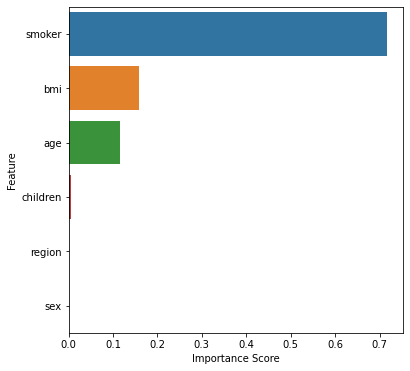

In [59]:
# After training the data set feature importance is calculated 

'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(model.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (6,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")


In [60]:
''' From the feature importance scores a new data frame is formaed to calculate the accuracy on the validation dataset'''

df_ins_3 = df_ins_2[['smoker','bmi','age','charges']]

In [61]:
df_ins_3.head()

,smoker,bmi,age,charges
0,2,27.900,19,16884.92400
1,1,33.770,18,1725.55230
2,1,33.000,28,4449.46200
3,1,22.705,33,21984.47061
4,1,28.880,32,3866.85520


In [62]:
#Insurance Charges is calculated
x_feat_imp = df_ins_3.drop('charges', axis=1)
y_feat_imp = df_ins_3['charges']
print(x_feat_imp.shape)
print(y_feat_imp.shape)

(1338, 3)
(1338,)


In [63]:
#Splitting the data to form train and validation datasets
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()


x_trn_1,x_val_1 = split_df(x_feat_imp,730)
y_trn_1,y_val_1 = split_df(y_feat_imp,730)
print(x_trn_1.shape,x_val_1.shape,y_trn_1.shape,y_val_1.shape)
print(y_trn_1.head(5))
print(y_val_1.head(5))

(730, 3) (608, 3) (730,) (608,)
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64
730    19361.99880
731    10065.41300
732     4234.92700
733     9447.25035
734    14007.22200
Name: charges, dtype: float64


In [64]:
#RandomforestRegressor()

mod_ins_1 = RandomForestRegressor(n_jobs = -1,oob_score = False,n_estimators = 20,
                                   max_depth = 300,min_samples_leaf = 25)
mod_ins_1.fit(x_trn_1,y_trn_1)


RandomForestRegressor(max_depth=300, min_samples_leaf=25, n_estimators=20,
                      n_jobs=-1)

In [66]:
y_val_pred_1 = mod_ins_1.predict(x_val_1)
print(x_val_1.shape)
print(y_val_pred_1)
y_val_pred_1.shape

(608, 3)
[21354.60537562 14073.97306082  5226.70447168 11036.86181477
 14656.29884257 10608.04048717 40891.14296589  5844.56002294
 40671.75042939 40671.75042939  8292.16596957 21354.60537562
 43385.65091148  6589.36508405 12014.54721115 11390.90436511
  7364.41164331  2259.60748204 10399.79925898  5477.98832133
 21354.60537562  2508.98934538 15096.40210192 14055.58225785
  4853.13756171  6540.60021392  7676.13131362 21652.99972573
  5337.61165391 40671.75042939  4017.21253634  4037.11808563
 21354.60537562  5480.96549957  8265.10350987 14006.04762107
 10399.79925898  7463.68924189 15096.40210192  7676.13131362
 15005.02296349 14073.97306082  8445.96992735 21354.60537562
  7384.30260896 11180.58652397  7104.60609893  8445.96992735
  6971.88668724 13872.07541917 21354.60537562  3810.61201604
 11083.6732576  21652.99972573  6397.55131446  7321.93353616
 14760.84571925  4037.11808563  7114.11033539 15505.91728938
  7087.21749132  2257.04623064  2600.25650382 21652.99972573
  6649.96779535

(608,)

In [67]:
#R squared value

from sklearn.metrics import r2_score
print('R squared: %.3f'% r2_score(y_val_1, y_val_pred_1))

R squared: 0.841


In [69]:
#RMSE Value

from sklearn.metrics import mean_squared_error
mean = mean_squared_error(y_val_1, y_val_pred_1) 
rmse = np.sqrt(mean_squared_error(y_val_1, y_val_pred_1))
print(rmse)

4789.566064749399


In [71]:
'''Read in test data'''
df_ins_test = pd.read_csv(r'C:\Users\Lokesh Balaji\Desktop\NEU Study\INFO6105\insurance.csv')
df_ins_test.head



<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [73]:
#funtion implementation
df_ins_test_1 = str_to_cat(df_ins_test)
df_ins_test_2,my_table = mydf_preprocessor(df_ins_test_1,null_table = None)
df_ins_test_2.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,4,16884.92400
1,18,2,33.770,1,1,3,1725.55230
2,28,2,33.000,3,1,3,4449.46200
3,33,2,22.705,0,1,2,21984.47061
4,32,2,28.880,0,1,2,3866.85520


In [74]:
''' From the feature importance scores a new data frame is formaed to calculate the accuracy on the validation dataset'''

df_ins_test_3 = df_ins_test_2[['smoker','bmi','age']]
df_ins_test_3.head()

,smoker,bmi,age
0,2,27.900,19
1,1,33.770,18
2,1,33.000,28
3,1,22.705,33
4,1,28.880,32


In [75]:
'''Predictions for the test set'''
y_test_pred = model_1.predict(df_test_3)
#print(df_ins_test_3)
print(y_test_pred)
y_test_pred.shape

[21574.36853005  3682.38683707  5565.19364072 ...  3755.21498554
  2587.82310319 21574.36853005]


(1338,)